# How to simulate stock prices with Python

In today’s issue, I’m going to show you how to simulate stock prices using Geometric Brownian Motion (GBM).

Simulating prices is fundamental for pricing derivatives. In the case of GBM, it is the key part of pricing equity options using Black-Scholes. Understanding how to simulate stock prices is foundational for any quantitative finance work. In fact, the math behind GBM was a good portion of my master’s degree.

# Step 1: What is Geometric Brownian Motion?

This is an abstract concept so I want to explain what GBM is all about.

Brownian motion comes from physics. It describes the random movement of particles in a substance. A Wiener process is a one-dimentional Brownian motion. It’s named after Norbert Wiener who won a Nobel Prize studying one-dimentional Brownian motions.

The Wiener process features prominently in quantitative finance because of some useful mathemetical properties.

The GBM is a continuous-time stochastic process where where the log of the random variable follows the Wiener process with drift.

What?

It’s a data series that trends up or down through time with a defined level of volatility.

And it’s perfect for simulating stock prices.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# setup params for brownian motion
s0 = 131.00
sigma = 0.25
mu = 0.35

# setup the simulation
paths = 1000
delta = 1.0/252.0
time = 252 * 5

Start by defining the initial stock price, s0. Then sigma which is the percentage volatility. Finally, mu (drift), which determine the overall trend.

Setup the simulation with 1,000 simulation paths. delta refers to the time step. I want to model a new stock price every day so I use 1/252 to represent 1 day in 252 trading days. The length of the simulation is 5 years.

# Step 4: Build the functions

The first step is to build a function that returns a Wiener process. This function returns a 2-dimentional array with 1,260 rows and 1,000 columns. Each row is a day and each column is a simulation path.

In [5]:
def wiener_process(delta, sigma, time, paths):
    """Returns a Wiener process

    Parameters
    ----------
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    paths : int
        Number of price simulations to create

    Returns
    -------
    wiener_process : np.ndarray

    Notes
    -----
    This method returns a Wiener process.
    The Wiener process is also called Brownian
    motion. For more information about the
    Wiener process check out the Wikipedia
    page: http://en.wikipedia.org/wiki/Wiener_process
    """

    # return an array of samples from a normal distribution
    return sigma * np.random.normal(loc=0, scale=np.sqrt(delta), size=(time, paths))


# Next, I define a function that creates the GBM returns.

def gbm_returns(delta, sigma, time, mu, paths):
    """Returns from a Geometric brownian motion

    Parameters
    ----------
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    mu : float
        Percentage drift
    paths : int
        Number of price simulations to create

    Returns
    -------
    gbm_returns : np.ndarray

    Notes
    -----
    This method constructs random Geometric Brownian
    Motion (GBM).
    """
    process = wiener_process(delta, sigma, time, paths)
    return np.exp(
        process + (mu - sigma**2 / 2) * delta
    )
# Finally, I prepend a row of 1s to the returns array and multiply the starting stock price by the cumulative product of the GBM returns to produce the price paths.

def gbm_levels(s0, delta, sigma, time, mu, paths):
    """Returns price paths starting at s0

    Parameters
    ----------
    s0 : float
        The starting stock price
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    mu : float
        Percentage drift
    paths : int
        Number of price simulations to create

    Returns
    -------
    gbm_levels : np.ndarray
    """
    returns = gbm_returns(delta, sigma, time, mu, paths)

    stacked = np.vstack([np.ones(paths), returns])
    return s0 * stacked.cumprod(axis=0)

# Step 4: Visualize the results

I want to demonstrate two examples.

The first example simulates 1,000 price paths over 5 years. It starts at a price of 131 with 25% annualized volatility and 35% average return per year. This is the volatility and return of Apple in 2021.

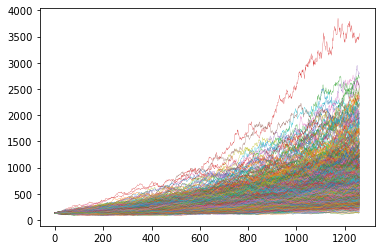

In [6]:
price_paths = gbm_levels(s0, delta, sigma, time, mu, paths)
plt.plot(price_paths, linewidth=0.25)
plt.show()

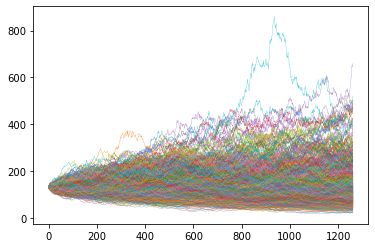

In [7]:
# As you might expect, a 35% drift causes most price paths to increase from from the initial price. In fact we can test exactly how many have increased from the initial price.

len(price_paths[-1, price_paths[-1, :] > s0])
# 999 of the 1,000 samples have increased.

# In the second example I set the drift to 0.0.

price_paths = gbm_levels(s0, delta, sigma, time, 0.0, paths)
plt.plot(price_paths, linewidth=0.25)
plt.show()